In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df= pd.read_csv("/home/shree_xd/Downloads/Parkinsons/telemonitoring/unlabelled.data")

# EDA

In [5]:
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [6]:
df.isna().sum()

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

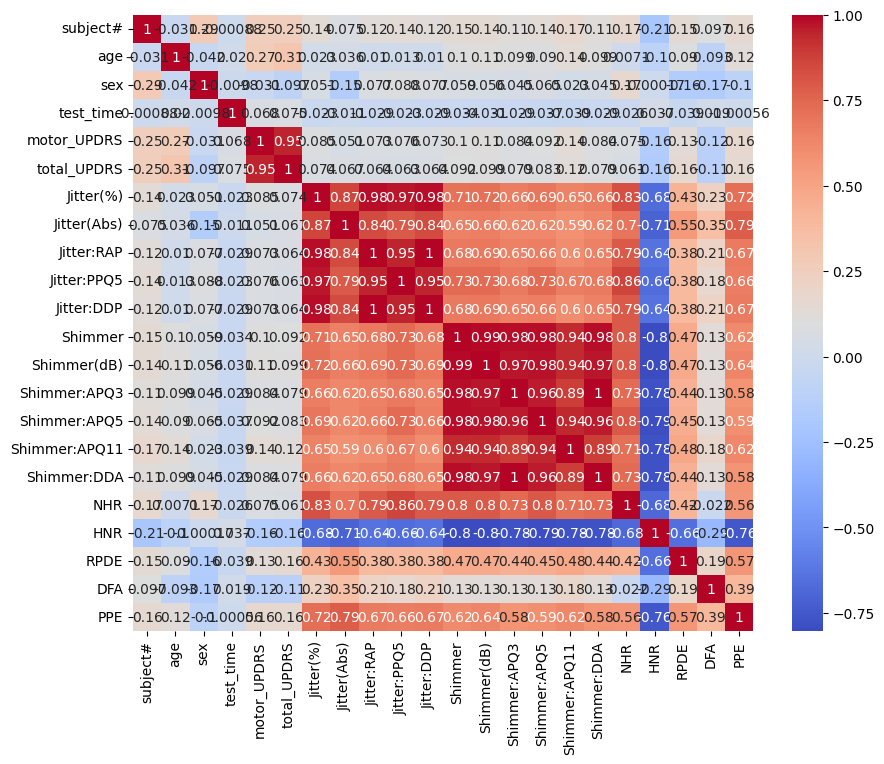

In [7]:
corr_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

/tmp/ipykernel_50900/372989645.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Jitter(%)'])
/tmp/ipykernel_50900/372989645.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Shimmer(dB)'])


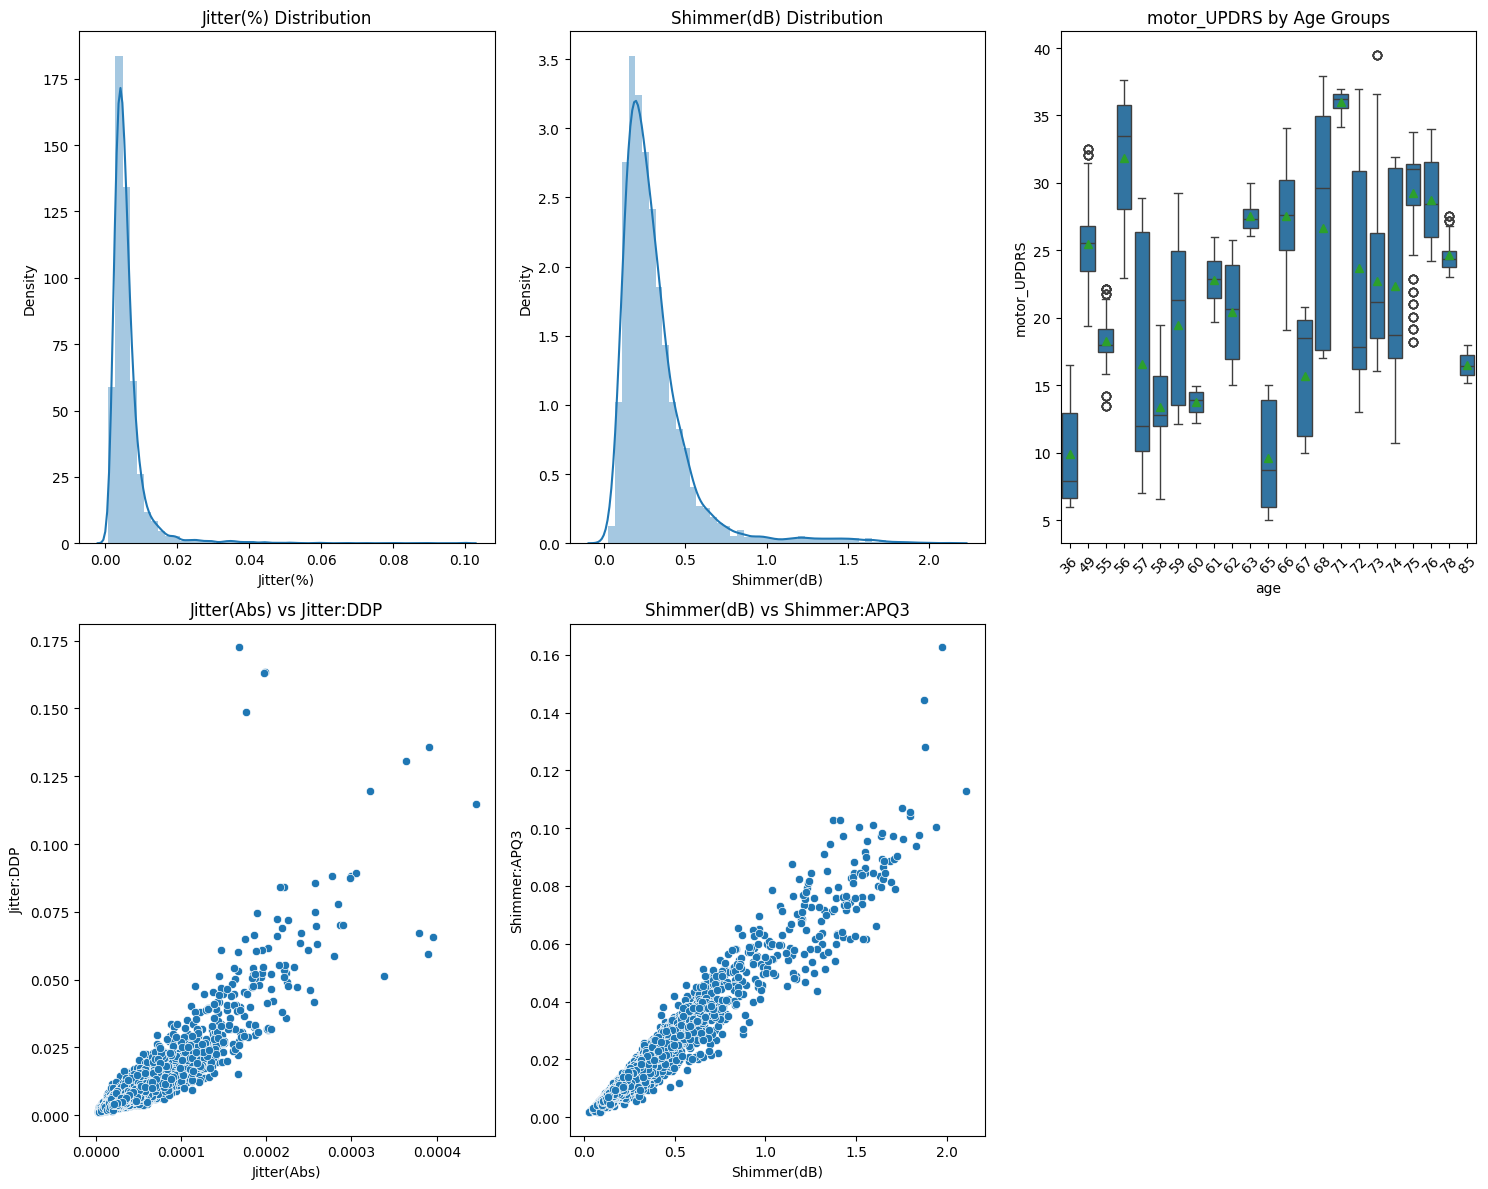

In [8]:
plt.figure(figsize=(15, 12))  

plt.subplot(2, 3, 1)  
sns.distplot(df['Jitter(%)'])
plt.title('Jitter(%) Distribution')

plt.subplot(2, 3, 2)
sns.distplot(df['Shimmer(dB)'])
plt.title('Shimmer(dB) Distribution')

plt.subplot(2, 3, 3)
sns.boxplot(x="age", y="motor_UPDRS", showmeans=True, data=df)  
plt.title('motor_UPDRS by Age Groups')
plt.xticks(rotation=45)  

plt.subplot(2, 3, 4)
sns.scatterplot(x="Jitter(Abs)", y="Jitter:DDP", data=df)
plt.title('Jitter(Abs) vs Jitter:DDP')

plt.subplot(2, 3, 5)
sns.scatterplot(x="Shimmer(dB)", y="Shimmer:APQ3", data=df)
plt.title('Shimmer(dB) vs Shimmer:APQ3')

plt.tight_layout()

plt.show()

# Preprocessing

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
sdf = pd.DataFrame(scaled_data, columns=df.columns)


In [10]:
sdf.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,-1.656596,0.815695,-0.682509,-1.632090,0.849197,0.502745,0.082905,-0.284242,0.327453,-0.028637,...,-0.351642,-0.209709,-0.423356,-0.543466,-0.209704,-0.298721,-0.009205,-1.214066,-1.478500,-0.650658
1,-1.656596,0.815695,-0.682509,-1.500676,0.879706,0.549103,-0.560793,-0.756723,-0.533746,-0.476212,...,-0.573156,-0.545158,-0.565592,-0.529955,-0.545153,-0.351965,1.282650,-1.055119,-1.247880,-1.218585
2,-1.656596,0.815695,-0.682509,-1.369410,0.910216,0.595367,-0.238944,-0.539382,-0.300038,-0.320767,...,-0.564469,-0.741592,-0.702426,-0.645545,-0.741587,-0.199370,0.318711,-0.784860,-1.540139,-0.103280
3,-1.656596,0.815695,-0.682509,-1.257773,0.936051,0.634716,-0.155370,-0.485186,-0.344859,-0.170682,...,0.069668,-0.460540,-0.449763,-0.392849,-0.460787,-0.071754,0.644530,-0.536487,-1.062115,1.237075
4,-1.656596,0.815695,-0.682509,-1.108169,0.970743,0.687522,-0.498557,-0.663894,-0.658604,-0.529814,...,-0.586186,-0.783145,-0.651413,-0.464905,-0.783392,-0.343370,1.036305,-0.689195,-1.297953,-0.283954


In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5

outliers = (df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))

outlier_counts = outliers.sum()

print("Outlier counts for each column:")
print(outlier_counts)

rows_with_outliers = df[outliers.any(axis=1)]
print("Rows with outliers:")
print(rows_with_outliers)

Outlier counts for each column:
subject#           0
age              101
sex                0
test_time          0
motor_UPDRS        0
total_UPDRS        0
Jitter(%)        398
Jitter(Abs)      366
Jitter:RAP       414
Jitter:PPQ5      425
Jitter:DDP       413
Shimmer          333
Shimmer(dB)      332
Shimmer:APQ3     332
Shimmer:APQ5     314
Shimmer:APQ11    314
Shimmer:DDA      331
NHR              436
HNR              171
RPDE              26
DFA                0
PPE              206
dtype: int64
Rows with outliers:
      subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
36           1   72    0    89.6350       31.309       40.412    0.00991   
124          1   72    0     5.6458       28.199       34.399    0.00250   
157          2   58    0    59.8000       12.208       14.604    0.00783   
160          2   58    0    80.7490       12.631       14.816    0.01131   
161          2   58    0    90.7990       12.834       14.917    0.01114   
...        ...  .

# Training

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(sdf)
clusters = kmeans.predict(sdf)

silhouette_vals = silhouette_samples(sdf, clusters)
silhouette = silhouette_score(sdf, clusters)
print("Silhouette Score:", silhouette)

inertia = kmeans.inertia_
print("Inertia:", inertia)

cluster_labels = kmeans.labels_
kdf = pd.concat([df, pd.Series(cluster_labels, name='KmeanLabels')], axis=1)



Silhouette Score: 0.6522664852098574
Inertia: 91657.54478361036


In [13]:
kdf.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE',
       'KmeanLabels'],
      dtype='object')

In [14]:
kdf["KmeanLabels"]

0       0
1       0
2       0
3       0
4       0
       ..
5870    0
5871    0
5872    0
5873    0
5874    0
Name: KmeanLabels, Length: 5875, dtype: int32

In [15]:
kdf.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,KmeanLabels
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,0
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,0
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,0
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,0
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,0


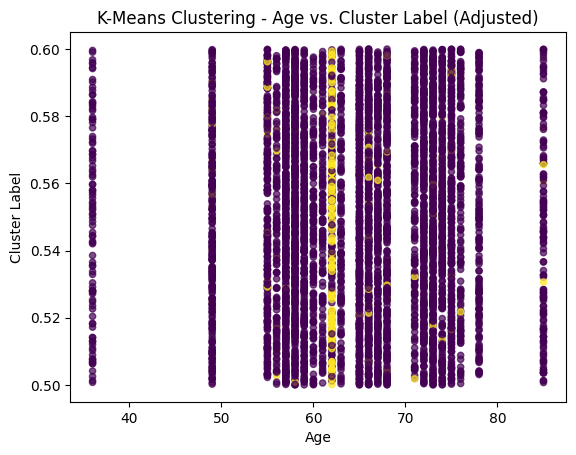

In [16]:
plt.scatter(kdf["age"], np.random.rand(len(kdf)) * 0.1 + 0.5, c=kdf['KmeanLabels'], s=20, alpha=0.7)  # Adjust parameters as needed

plt.xlabel("Age")
plt.ylabel("Cluster Label")
plt.title("K-Means Clustering - Age vs. Cluster Label (Adjusted)")

plt.show()


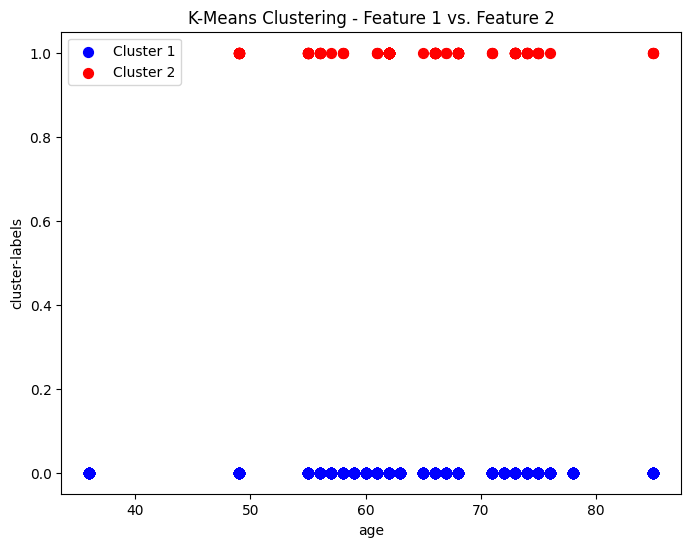

In [24]:
feature1 = kdf['age']
feature2 = kdf['KmeanLabels']

cluster1_data = kdf[kdf['KmeanLabels'] == 0]  
cluster2_data = kdf[kdf['KmeanLabels'] == 1]  

cluster1_feature1 = cluster1_data['age']
cluster1_feature2 = cluster1_data['KmeanLabels']

cluster2_feature1 = cluster2_data['age']
cluster2_feature2 = cluster2_data['KmeanLabels']

plt.figure(figsize=(8, 6))
plt.scatter(cluster1_feature1, cluster1_feature2, label='Cluster 1', s=50, c='blue')
plt.scatter(cluster2_feature1, cluster2_feature2, label='Cluster 2', s=50, c='red')

plt.xlabel('age')
plt.ylabel('cluster-labels')
plt.title('K-Means Clustering - Feature 1 vs. Feature 2')
plt.legend()

plt.show()
